In [357]:
%matplotlib inline

In [358]:
import re
import time
import json
from os import path
from collections import Counter
import copy

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import division, unicode_literals
from __future__ import print_function
from nltk.stem import *
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from wordcloud import WordCloud

import sys
reload(sys)
sys.setdefaultencoding('utf-8')

Using http://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html

In [359]:
campaign_str = "Kerry_2004"
campaign_file = "../out/" + campaign_str + ".json"

with open(campaign_file, "r") as infile:
    campaign_data = json.load(infile)
### Aggregated speeches

### Aggregated speeches

In [360]:
stemmer = SnowballStemmer("english")

In [361]:
all_speeches = ""

for title in campaign_data:
    #all_speeches += campaign_data[title]['speech']
    all_speeches += stemmer.stem(campaign_data[title]['speech'])

### Using NLTK

In [362]:
ignore_words = ['i','years',']','laughter','plan','way','lot','thing','things','matter',
                'reason',' ','[','%','day','year',
                'trump','donald','hillary','clinton','romney','obama','mccain','barack',
               'mitt','romney','kerry',
               'today','families','country','time','state','states','something','right',
               'kind',
               'people','children','president','home','part',
               'senator','everything','problem','future','issue','question','hampshire',
               'election','bush','member','audience','everybody','folks','applause',
                'cheers','thank','thanks']

In [363]:
%%time
# takes a while to run
nltk_tokens = word_tokenize(all_speeches)
nouns = [token for token, pos in pos_tag(nltk_tokens) if pos.startswith('N')]

In [364]:
df_noun_count = pd.DataFrame(pd.Series(dict(Counter(nouns))), columns=["count"])
df_noun_count['word'] = df_noun_count.index
df_noun_count = df_noun_count.reset_index(drop=True)
df_noun_count['word'].map(lambda x: (re.sub('[^A-Za-z]+', ' ',x)))
df_noun_count = df_noun_count[df_noun_count['word'].map(
        lambda x: (x not in ignore_words) and len(x) > 1)]

In [365]:
df_noun_count_small = df_noun_count.sort("count", ascending=False).head(1000)
df_noun_count_small.head(50)

,count,word
197,1091,america
3093,680,jobs
2611,522,health
859,467,care
247,431,americans
6152,418,world
772,414,bush
5452,375,tax
5968,332,war
2994,323,iraq


In [366]:
df_noun_count_small.to_csv('../out/' + campaign_str + '_top_words.csv')

### Paste back into wordcloud with reduced file

In [367]:
df_compressed_count = copy.deepcopy(df_noun_count)

In [368]:
df_compressed_count['count'] = df_compressed_count['count'] / 10
df_compressed_count['count'] = df_compressed_count['count'].astype(int)
df_compressed_count = df_compressed_count[df_compressed_count['count'] > 1]

Hacking up a word cloud from frequency cound table...

In [369]:
#df_compressed_count.sort("count", ascending=False)
new_string = ""
for idx, row in df_compressed_count.iterrows():
    new_string += (row["word"] + " ") * row["count"] + " "

In [370]:
cv = CountVectorizer(min_df=0, stop_words="english", max_features=200)
counts = cv.fit_transform([new_string]).toarray().ravel()
scaled_counts = counts / float(counts.max())
words = np.array(cv.get_feature_names())

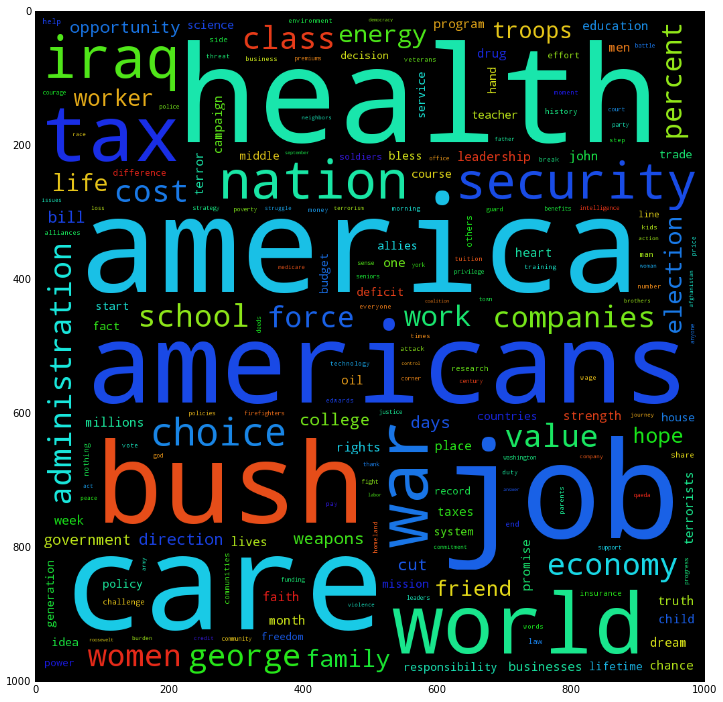

In [371]:
mask1 = np.empty([1000,1000])
wordcloud = WordCloud(mask=mask1, margin=20).generate(new_string)
plt.figure(1, figsize=(12,12))
plt.imshow(wordcloud)
plt.savefig('../img/' + campaign_str + '_word_cloud.png')